### Link to dataset kaggle page
https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

### Dataset Version Number 28
https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/download?datasetVersionNumber=28

# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime

In [2]:
# read csv
df = pd.read_csv("./data/games.csv")

# reorganise by appid and drop not used columns
df = df.sort_values('AppID').reset_index()
df.drop(columns=["index","Required age", "About the game", "Header image", "Website", "Support url", "Support email", "Metacritic url", "Screenshots", "Movies", "Reviews", "Score rank", "Notes"], inplace=True)

In [3]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,DLC count,Supported languages,Full audio languages,Windows,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,10,Counter-Strike,"Nov 1, 2000",10000000 - 20000000,13230,9.99,0,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",True,...,122770,10524,1733,228,733,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba..."
1,20,Team Fortress Classic,"Apr 1, 1999",5000000 - 10000000,110,4.99,0,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,...,4722,143,0,23,0,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh..."
2,30,Day of Defeat,"May 1, 2003",5000000 - 10000000,106,4.99,0,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,...,3246,1397,0,27,0,Valve,Valve,"Multi-player,Valve Anti-Cheat enabled",Action,"FPS,World War II,Multiplayer,Shooter,Action,Wa..."
3,40,Deathmatch Classic,"Jun 1, 2001",5000000 - 10000000,2,4.99,0,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,...,1570,945,0,10,0,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Classic,Multiplayer,Shooter,First-P..."
4,50,Half-Life: Opposing Force,"Nov 1, 1999",5000000 - 10000000,120,4.99,0,"['English', 'French', 'German', 'Korean']",[],True,...,12374,214,0,66,0,Gearbox Software,Valve,"Single-player,Multi-player,Valve Anti-Cheat en...",Action,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter..."


In [138]:
df.tail()

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,DLC count,Supported languages,Full audio languages,Reviews,...,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
85098,2760980,Z Ops: Campus Playtest,"Jan 5, 2024",0 - 0,0,0.0,0,[],[],NaN,...,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
85099,2761170,Stay Playtest,"Jan 4, 2024",0 - 0,0,0.0,0,[],[],NaN,...,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
85100,2763480,生物召唤：对决时刻 Playtest,"Jan 7, 2024",0 - 0,0,0.0,0,[],[],NaN,...,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
85101,2764930,Cryptis Playtest,"Jan 4, 2024",0 - 0,0,0.0,0,[],[],NaN,...,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
85102,2765800,Scorching Engines Playtest,"Jan 6, 2024",0 - 0,0,0.0,0,[],[],NaN,...,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [139]:
df.describe()

,AppID,Peak CCU,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80505 entries, 0 to 85088
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       80505 non-null  int64         
 1   Name                        80502 non-null  object        
 2   Release date                80505 non-null  datetime64[ns]
 3   Estimated owners            80505 non-null  object        
 4   Peak CCU                    80505 non-null  int64         
 5   Price                       80505 non-null  float64       
 6   DLC count                   80505 non-null  int64         
 7   Supported languages         80505 non-null  object        
 8   Full audio languages        80505 non-null  object        
 9   Windows                     80505 non-null  bool          
 10  Mac                         80505 non-null  bool          
 11  Linux                       80505 non-null  bool          


In [173]:
df.isnull().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Price                             0
DLC count                         0
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     3587
Publishers                     3867
Categories                     4598
Genres                         3555
Tags                          21100
Owners                      

# Create columns

In [6]:
#Filter out non-game rows

df['Software'] = np.where(df['Categories'].str.contains('Software'), 1, 0)
print(df.Software.value_counts())

df = df[df.Software == 0]
print(df.Software.value_counts())

# Create columns of support of all 3 os

df["OS3"] = False
for index, row in df.iterrows():
    if row["Windows"] & row["Mac"] & row["Linux"]:
        df.loc[index, "OS3"] = True

# Create row of free games

df["Free"] = False
for index, row in df.iterrows():
    if row["Price"] == 0:
        df.loc[index, "Free"] = True

# Create numerical row of owners

df["Owners"] = np.nan
for index, row in df.iterrows():
    match row["Estimated owners"]:
        case "0 - 0":
            df.loc[index, "Owners"] = 0
        case "0 - 20000":
            df.loc[index, "Owners"] = 10000
        case "20000 - 50000":
            df.loc[index, "Owners"] = 35000
        case "50000 - 100000":
            df.loc[index, "Owners"] = 75000
        case "100000 - 200000":
            df.loc[index, "Owners"] = 150000
        case "200000 - 500000":
            df.loc[index, "Owners"] = 350000
        case "500000 - 1000000":
            df.loc[index, "Owners"] = 750000
        case "1000000 - 2000000":
            df.loc[index, "Owners"] = 1500000
        case "2000000 - 5000000":
            df.loc[index, "Owners"] = 3500000
        case "5000000 - 10000000":
            df.loc[index, "Owners"] = 7500000
        case "10000000 - 20000000":
            df.loc[index, "Owners"] = 15000000
        case "20000000 - 50000000":
            df.loc[index, "Owners"] = 35000000
        case "50000000 - 100000000":
            df.loc[index, "Owners"] = 75000000
        case "100000000 - 200000000":
            df.loc[index, "Owners"] = 150000000

# Create column of positive to negative ratio
df["Ratio"] = df["Positive"] / (df["Negative"]+1)

# Create column of multi-player single-player and PvP support

df["MP"] = np.where(df["Categories"].str.contains("Multi-player"), 1, 0)
df["SP"] = np.where(df["Categories"].str.contains("Single-player"), 1, 0)
df["PvP"] = np.where(df["Categories"].str.contains("PvP"), 1, 0)

# Release date column in datetime

df['Release date'] = pd.to_datetime(df['Release date'], format="mixed")

Software
0    80505
Name: count, dtype: int64
Software
0    80505
Name: count, dtype: int64


In [7]:
# Create views

top_df = df[df['Owners'] > 500000]
df_numeric = df.select_dtypes(include=('int64', 'float64', 'int32', 'bool', 'datetime64'))
top_df_numeric = top_df.select_dtypes(include=('int64', 'float64', 'int32', 'bool', 'datetime64'))

# Language analysis

In [8]:
df['Supported languages'].describe()

count           80505
unique          11176
top       ['English']
freq            42834
Name: Supported languages, dtype: object

In [9]:
languages = ""

for index, row in df.iterrows():
    languages += str(df["Supported languages"][index])

languages = languages.replace(",", "")
languages = languages.replace("[", "")
languages = languages.replace("]", "")

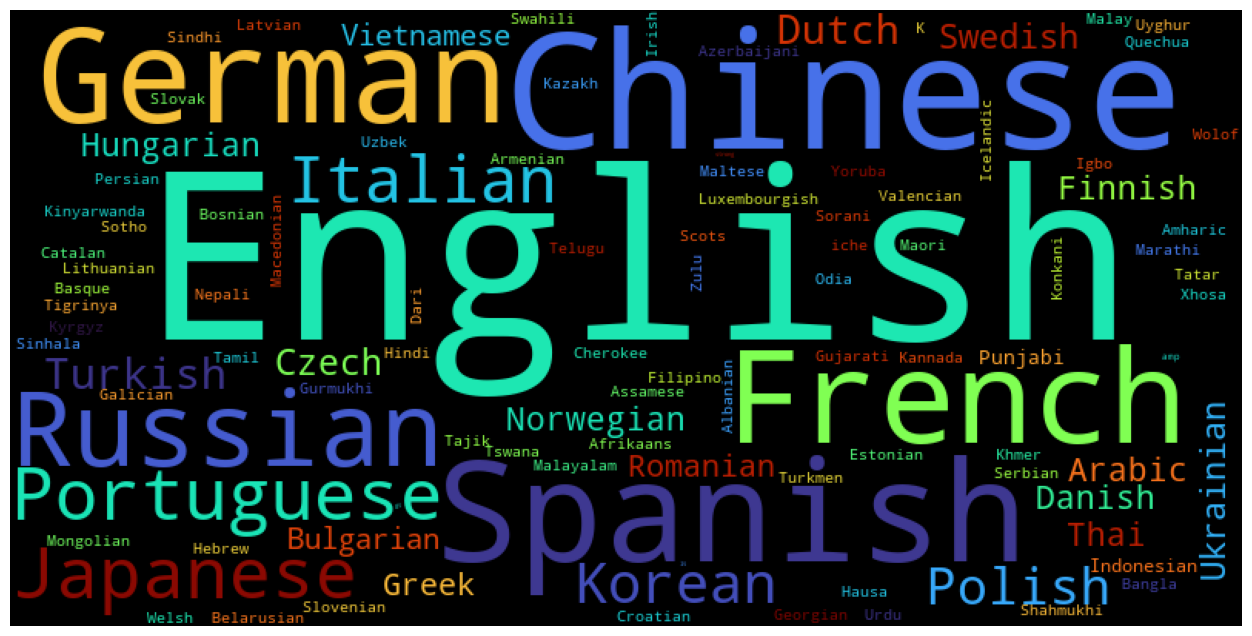

In [10]:
plt.subplots(figsize=(16,8))
wordcloud = WordCloud(
                          background_color='black',
                          width=800,
                          height=400,
                          collocations=False,
                          stopwords=["Simplified", "Traditional", "Brazil", "Portugal", "Spain", "Latin", "America"],
                          colormap="turbo"
                         ).generate(",".join(languages.split(sep="'")))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

Text(0.5, 1.0, 'English')

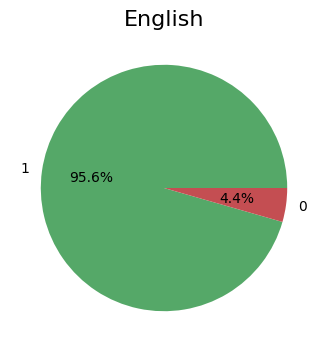

In [11]:
df['English'] = np.where(df['Supported languages'].str.contains('English'), 1, 0)

data = df['English'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#55a868", "#c44e52"]
        )
plt.title(
    label="English", 
    fontdict={"fontsize":16}
)

Text(0.5, 1.0, 'Spanish')

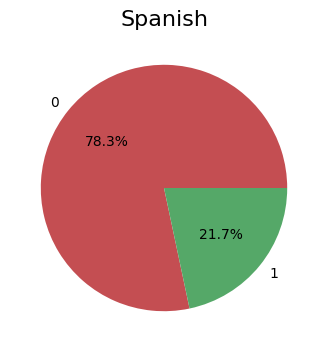

In [12]:
df['Spanish'] = np.where(df['Supported languages'].str.contains('Spanish'), 1, 0)

data = df['Spanish'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="Spanish", 
    fontdict={"fontsize":16}
    )

Text(0.5, 1.0, 'Chinese')

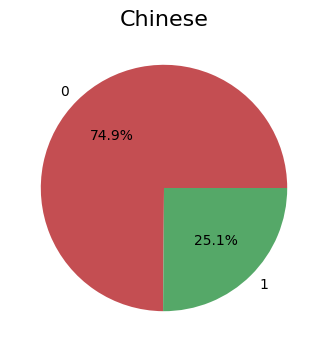

In [13]:
df['Chinese'] = np.where(df['Supported languages'].str.contains('Chinese'), 1, 0)

data = df['Chinese'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="Chinese", 
    fontdict={"fontsize":16}
        )

Text(0.5, 1.0, 'French')

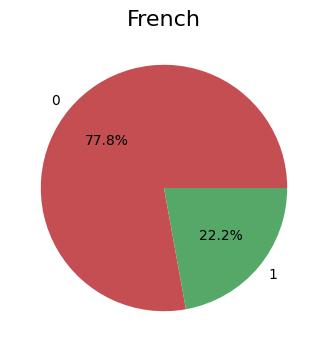

In [14]:
df['French'] = np.where(df['Supported languages'].str.contains('French'), 1, 0)

data = df['French'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="French", 
    fontdict={"fontsize":16}
        )

# OS

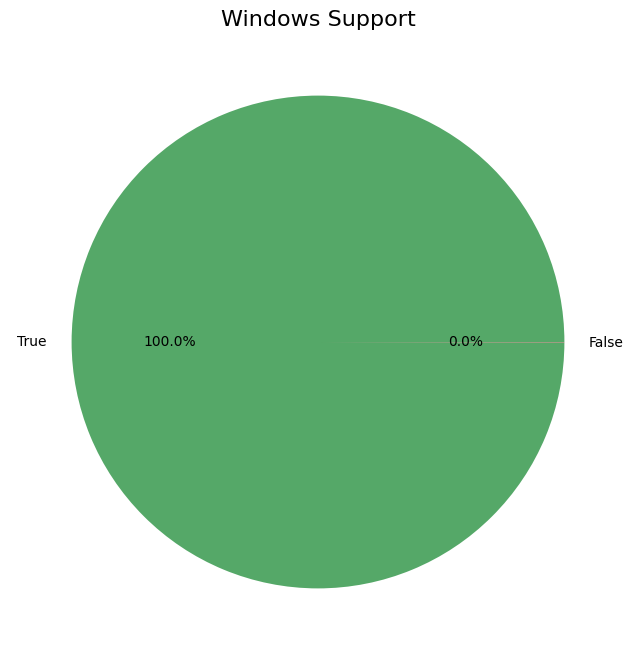

In [15]:
data = df['Windows'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#55a868", "#c44e52"]
        )
plt.title(
    label="Windows Support", 
    fontdict={"fontsize":16}
        );

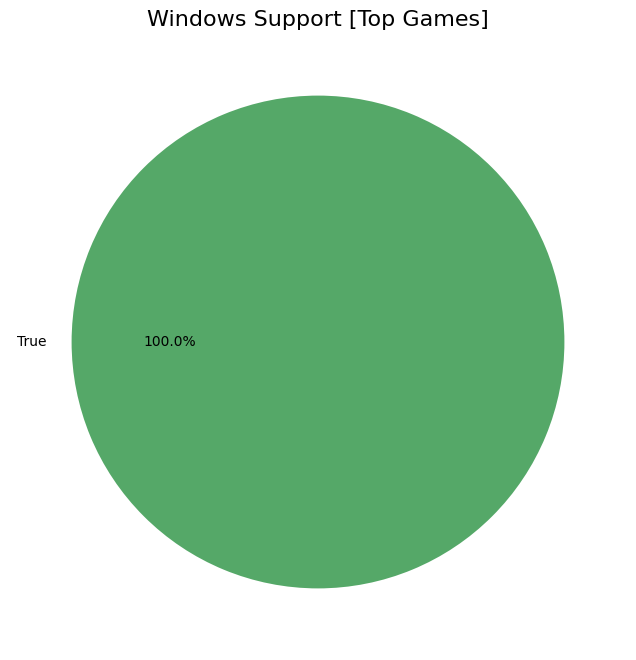

In [16]:
data = top_df['Windows'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#55a868", "#c44e52"]
        )
plt.title(
    label="Windows Support [Top Games]", 
    fontdict={"fontsize":16}
        );

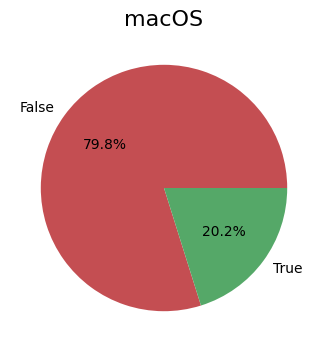

In [17]:
data = df['Mac'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="macOS", 
    fontdict={"fontsize":16}
        );

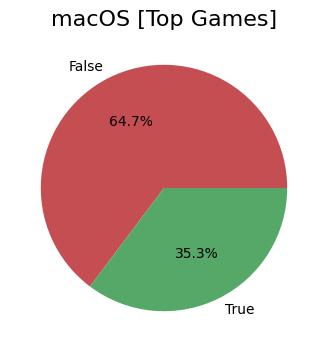

In [18]:
data = top_df['Mac'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="macOS [Top Games]", 
    fontdict={"fontsize":16}
        );

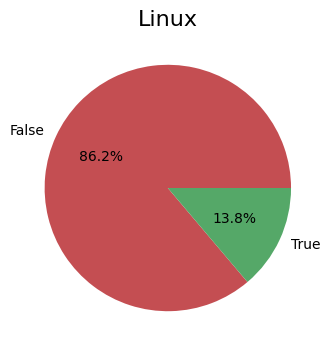

In [19]:
data = df['Linux'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="Linux", 
    fontdict={"fontsize":16}
        );

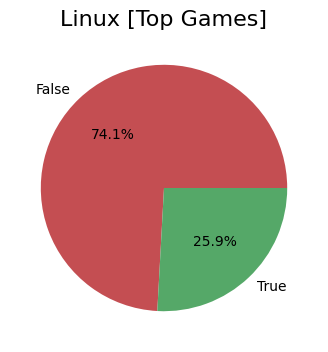

In [20]:
data = top_df['Linux'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="Linux [Top Games]", 
    fontdict={"fontsize":16}
        );

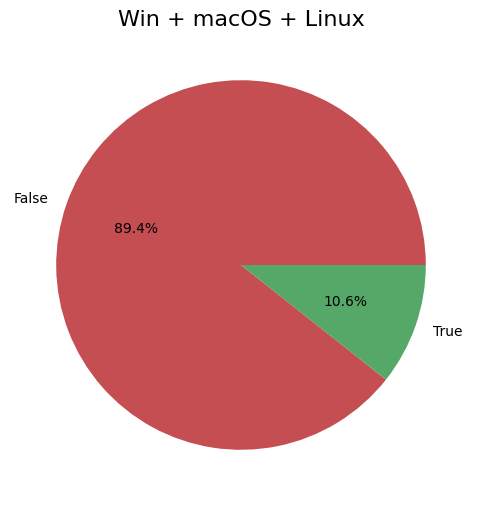

In [21]:
data = df['OS3'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="Win + macOS + Linux", 
    fontdict={"fontsize":16}
        );

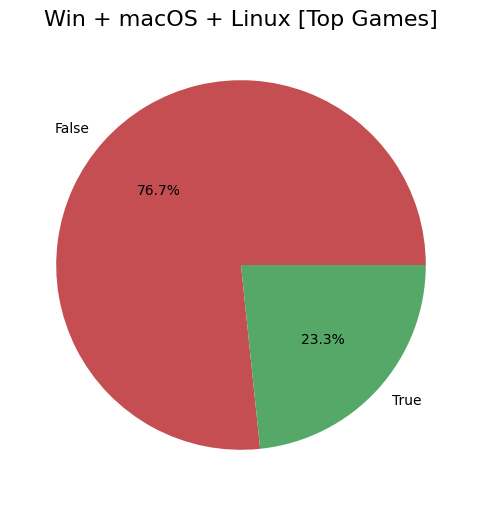

In [22]:
data = top_df['OS3'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="Win + macOS + Linux [Top Games]", 
    fontdict={"fontsize":16}
        );

# Ownership

In [23]:
df[df['Owners'] > 40000000].sort_values(by='Owners', ascending=False)

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,DLC count,Supported languages,Full audio languages,Windows,...,Free,Owners,Ratio,MP,SP,PvP,English,Spanish,Chinese,French
23,570,Dota 2,2013-07-09,100000000 - 200000000,558759,0.00,2,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...",True,...,True,150000000.0,4.916665,1,0,0,1,1,1,1
20,440,Team Fortress 2,2007-10-10,50000000 - 100000000,107702,0.00,1,"['English', 'Danish', 'Dutch', 'Finnish', 'Fre...","['English', 'Ukrainian']",True,...,True,75000000.0,14.531314,1,0,0,1,1,1,1
27,730,Counter-Strike: Global Offensive,2012-08-21,50000000 - 100000000,825215,0.00,1,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']",True,...,True,75000000.0,7.518698,1,0,0,1,1,1,1
13862,578080,PUBG: BATTLEGROUNDS,2017-12-21,50000000 - 100000000,275374,0.00,0,"['English', 'Korean', 'Simplified Chinese', 'F...",[],True,...,True,75000000.0,1.288708,1,0,1,1,1,1,1
32601,1063730,New World,2021-09-28,50000000 - 100000000,16688,39.99,0,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",True,...,False,75000000.0,2.096237,1,0,1,1,1,0,1


# Release date

In [24]:
df['Release date'].min()

Timestamp('1997-06-30 00:00:00')

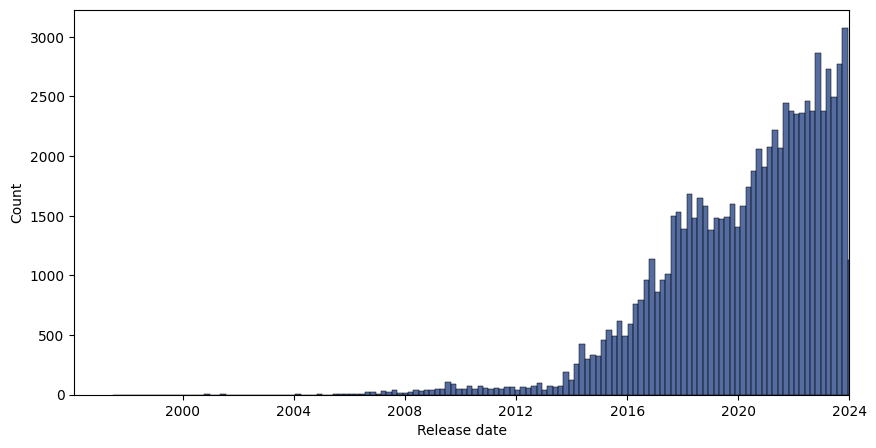

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df["Release date"], kde=False, color='#1b3b7f')

date_limit = datetime.strptime('2024-01-01', '%Y-%m-%d')
plt.xlim(None, date_limit)
plt.show()

# Price

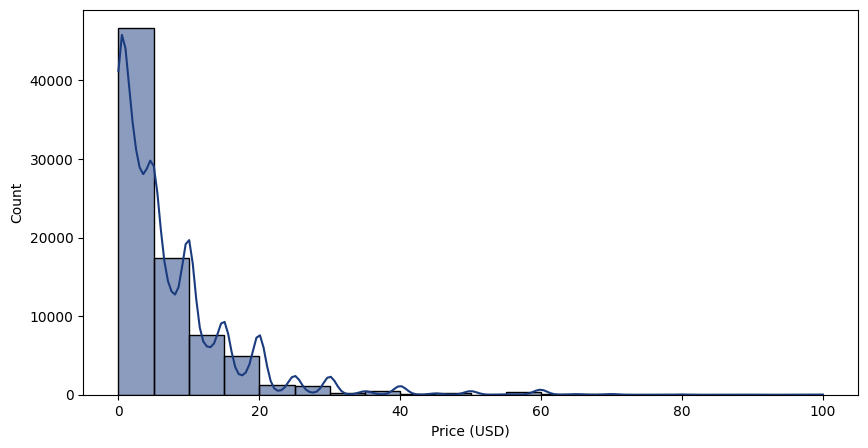

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df["Price"][df["Price"] < 100.0], kde=True, binwidth=5, color='#1b3b7f')
plt.xlabel("Price (USD)")
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

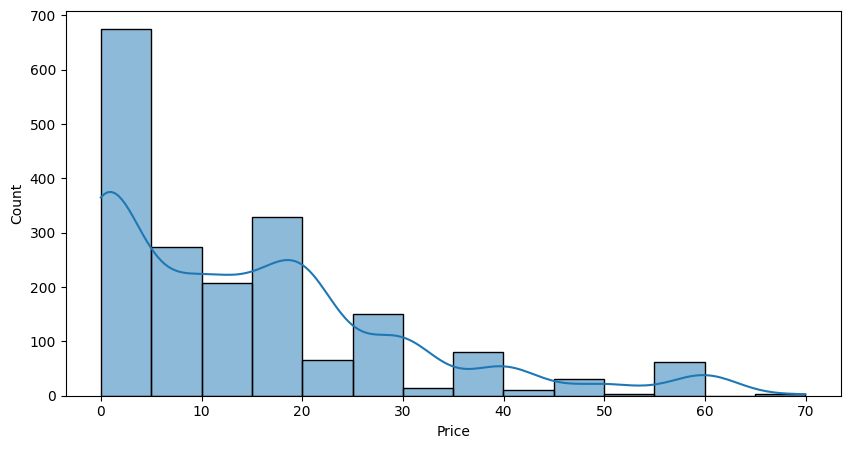

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(top_df["Price"], kde=True, binwidth=5)

Text(0.5, 1.0, 'Free Games')

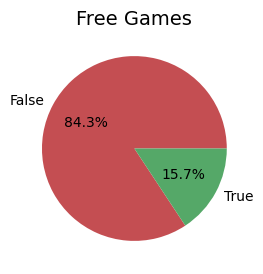

In [28]:
data = df['Free'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="Free Games", 
    fontdict={"fontsize":14}
        )

Text(0.5, 1.0, 'Free Games [Top Games]')

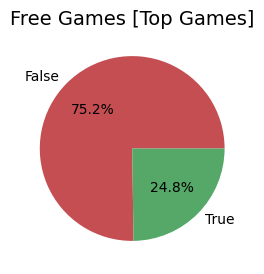

In [29]:
data = top_df['Free'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(data.values,
        labels=data.index,
        autopct='%.1f%%',
        colors=["#c44e52", "#55a868"]
        )
plt.title(
    label="Free Games [Top Games]", 
    fontdict={"fontsize":14}
        )

# Categories / Tags

In [30]:
df["Categories"].unique()

array(['Multi-player,PvP,Online PvP,Shared/Split Screen PvP,Valve Anti-Cheat enabled',
       'Multi-player,PvP,Online PvP,Shared/Split Screen PvP,Valve Anti-Cheat enabled,Remote Play Together',
       'Multi-player,Valve Anti-Cheat enabled', ...,
       'Multi-player,PvP,Online PvP,Co-op,Online Co-op,HDR available',
       'Multi-player,PvP,Online PvP,VR Only,Remote Play Together',
       'Single-player,Multi-player,PvP,Online PvP,LAN PvP,Steam Leaderboards'],
      dtype=object)

In [31]:
tag_words = ""
for index, row in df.iterrows():
    tag_words += ("," + str(df["Categories"][index]))

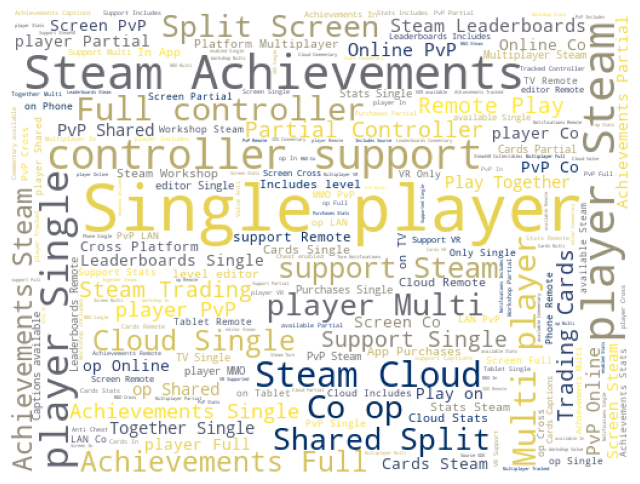

In [32]:
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384,
                          colormap="cividis",
                          stopwords="nan"
                         ).generate(",".join(tag_words.split(sep=',')))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

In [33]:
genre_words = ""
for index, row in df.iterrows():
    genre_words += ("," + str(df["Genres"][index]))

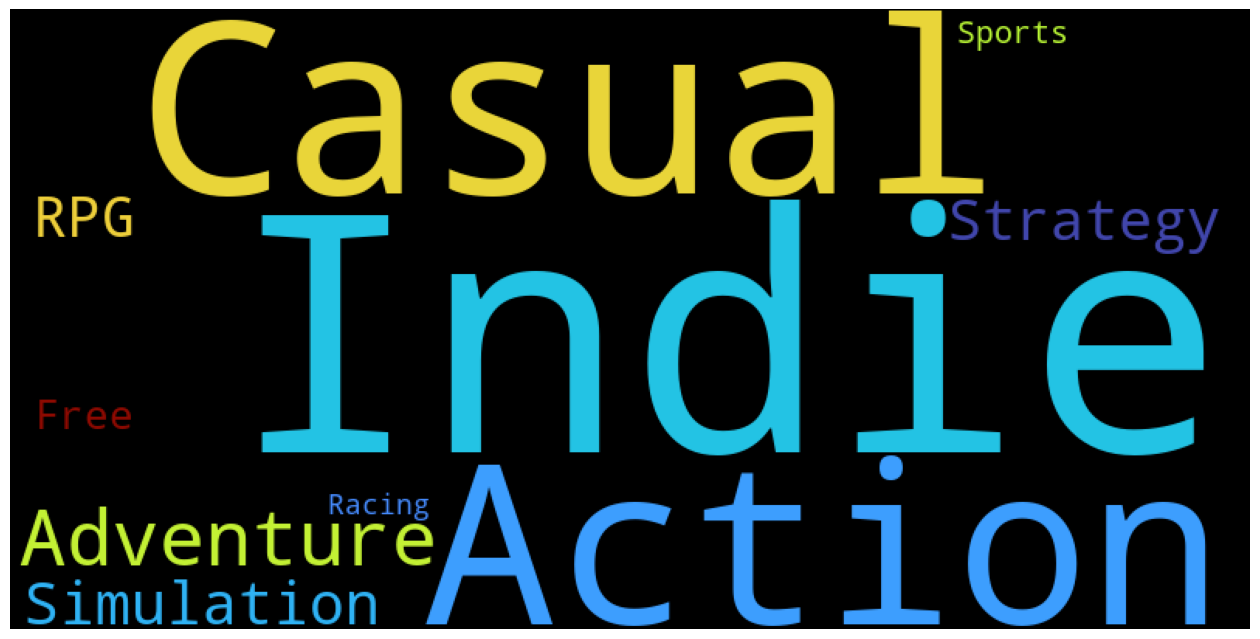

In [34]:
plt.subplots(figsize=(16,20))
wordcloud = WordCloud(
                          background_color='black',
                          width=800,
                          height=400,
                          collocations=False,
                          colormap="turbo",
                          stopwords=["Early", "Access", "to", "Play", "nan"],
                          max_words=10
                         ).generate(",".join(genre_words.split(sep=' ,')))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

# Genre analysis

In [35]:
df['action'] = np.where(df['Genres'].str.contains('Action'), 1, 0)
action_df = df[df['action'] == 1]
action_df

,AppID,Name,Release date,Estimated owners,Peak CCU,Price,DLC count,Supported languages,Full audio languages,Windows,...,Owners,Ratio,MP,SP,PvP,English,Spanish,Chinese,French,action
0,10,Counter-Strike,2000-11-01,10000000 - 20000000,13230,9.99,0,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",True,...,15000000.0,38.626752,1,0,1,1,1,1,1,1
1,20,Team Fortress Classic,1999-04-01,5000000 - 10000000,110,4.99,0,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,...,7500000.0,6.143939,1,0,1,1,1,1,1,1
2,30,Day of Defeat,2003-05-01,5000000 - 10000000,106,4.99,0,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,...,7500000.0,9.134039,1,0,0,1,1,0,1,1
3,40,Deathmatch Classic,2001-06-01,5000000 - 10000000,2,4.99,0,"['English', 'French', 'German', 'Italian', 'Sp...",[],True,...,7500000.0,4.496503,1,0,1,1,1,1,1,1
4,50,Half-Life: Opposing Force,1999-11-01,5000000 - 10000000,120,4.99,0,"['English', 'French', 'German', 'Korean']",[],True,...,7500000.0,19.934631,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85064,2741950,All She Wants For Christmas Is YOU,2024-01-04,0 - 20000,0,1.99,0,['English'],['English'],True,...,10000.0,21.000000,0,1,0,1,0,0,0,1
85071,2743870,My evil clones,2024-01-03,0 - 20000,0,29.99,0,['English'],['English'],True,...,10000.0,5.500000,0,1,0,1,0,0,0,1
85074,2744640,Shotgun Chicken,2024-01-04,0 - 20000,0,3.99,0,['English'],['English'],True,...,10000.0,1.000000,0,1,0,1,0,0,0,1
85080,2746630,Holly-Day Ice-Spionage,2024-01-04,0 - 20000,1,2.99,0,['English'],[],True,...,10000.0,1.000000,0,1,0,1,0,0,0,1


In [36]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33899 entries, 0 to 85081
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       33899 non-null  int64         
 1   Name                        33897 non-null  object        
 2   Release date                33899 non-null  datetime64[ns]
 3   Estimated owners            33899 non-null  object        
 4   Peak CCU                    33899 non-null  int64         
 5   Price                       33899 non-null  float64       
 6   DLC count                   33899 non-null  int64         
 7   Supported languages         33899 non-null  object        
 8   Full audio languages        33899 non-null  object        
 9   Windows                     33899 non-null  bool          
 10  Mac                         33899 non-null  bool          
 11  Linux                       33899 non-null  bool          


# Publishers & Devs

In [37]:
df.Publishers.value_counts().head(20)

Publishers
Big Fish Games                      499
8floor                              266
SEGA                                182
HH-Games                            172
Strategy First                      169
Square Enix                         162
Laush Studio                        160
Sekai Project                       158
Choice of Games                     154
Ubisoft                             141
THQ Nordic                          136
Kagura Games                        128
Atomic Fabrik,Cristian Manolachi    120
Ziggurat                            119
EroticGamesClub                     119
Alawar Entertainment                118
Boogygames Studios                  117
Slitherine Ltd.                     116
Electronic Arts                     112
Fulqrum Publishing                  112
Name: count, dtype: int64

In [38]:
top_df.Publishers.value_counts().head(10)

Publishers
Electronic Arts       55
Ubisoft               45
SEGA                  44
Square Enix           42
Bethesda Softworks    39
2K                    35
Valve                 33
Xbox Game Studios     31
Devolver Digital      27
Activision            25
Name: count, dtype: int64

In [39]:
top_df.Developers.value_counts().head(10)

Developers
Valve                    30
CAPCOM Co., Ltd.         16
Bethesda Game Studios    12
id Software              12
Square Enix              11
Firaxis Games            10
Ubisoft Montreal         10
DICE                     10
Telltale Games            9
BioWare                   9
Name: count, dtype: int64

# Numeric

In [40]:
df_numeric

,AppID,Release date,Peak CCU,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,...,Median playtime forever,Median playtime two weeks,Software,OS3,Free,Owners,Ratio,MP,SP,PvP
0,10,2000-11-01,13230,9.99,0,True,True,True,88,0,...,228,733,0,True,False,15000000.0,38.626752,1,0,1
1,20,1999-04-01,110,4.99,0,True,True,True,0,0,...,23,0,0,True,False,7500000.0,6.143939,1,0,1
2,30,2003-05-01,106,4.99,0,True,True,True,79,0,...,27,0,0,True,False,7500000.0,9.134039,1,0,0
3,40,2001-06-01,2,4.99,0,True,True,True,0,0,...,10,0,0,True,False,7500000.0,4.496503,1,0,1
4,50,1999-11-01,120,4.99,0,True,True,True,0,0,...,66,0,0,True,False,7500000.0,19.934631,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85082,2746760,2024-01-07,0,1.35,0,True,True,False,0,0,...,0,0,0,False,False,0.0,0.000000,0,1,0
85083,2747090,2024-01-03,0,7.99,0,True,False,False,0,0,...,0,0,0,False,False,10000.0,0.000000,0,1,0
85085,2748020,2024-01-05,0,9.99,0,True,False,False,0,0,...,0,0,0,False,False,10000.0,0.000000,0,1,0
85087,2749110,2024-01-04,0,2.09,0,True,False,False,0,0,...,0,0,0,False,False,0.0,0.000000,0,1,0


<Axes: >

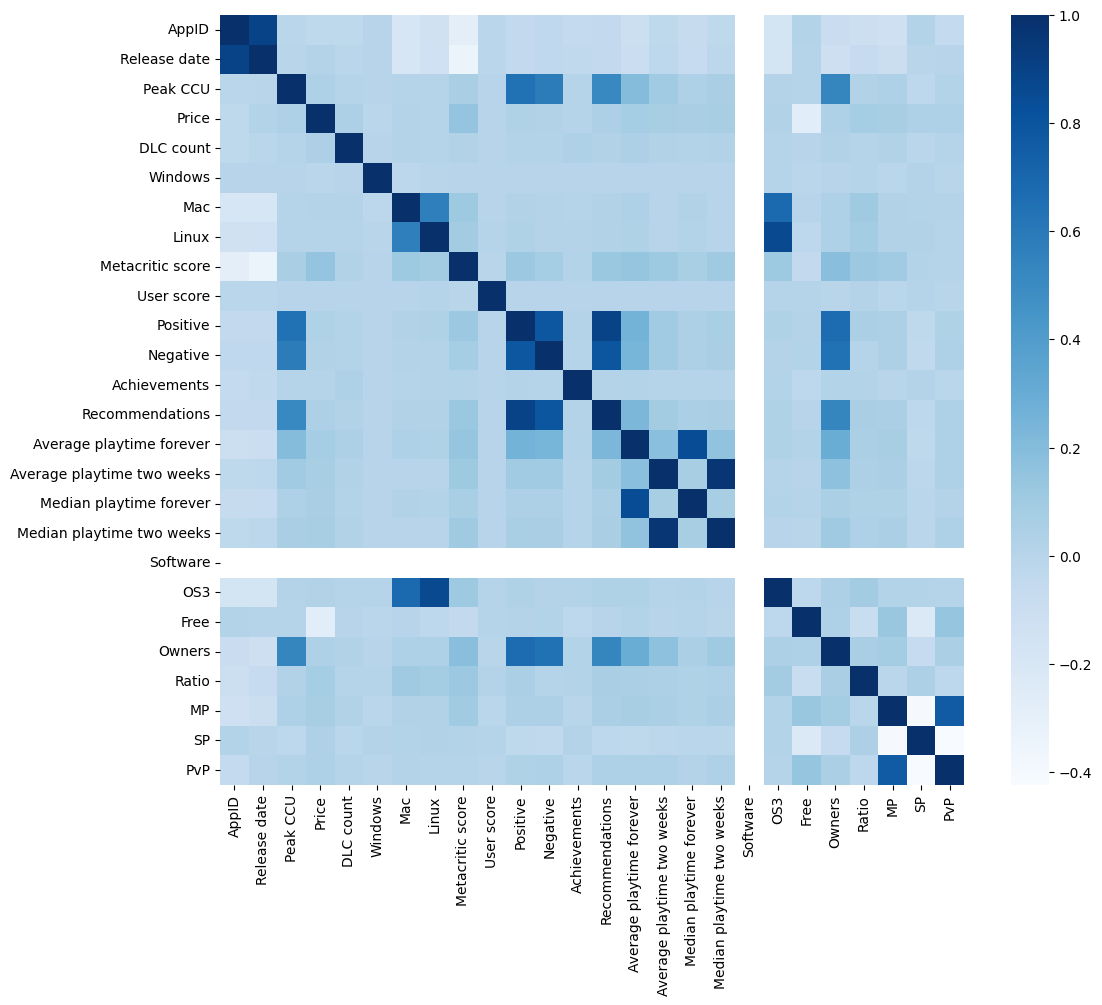

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(),cmap='Blues',annot=False) 

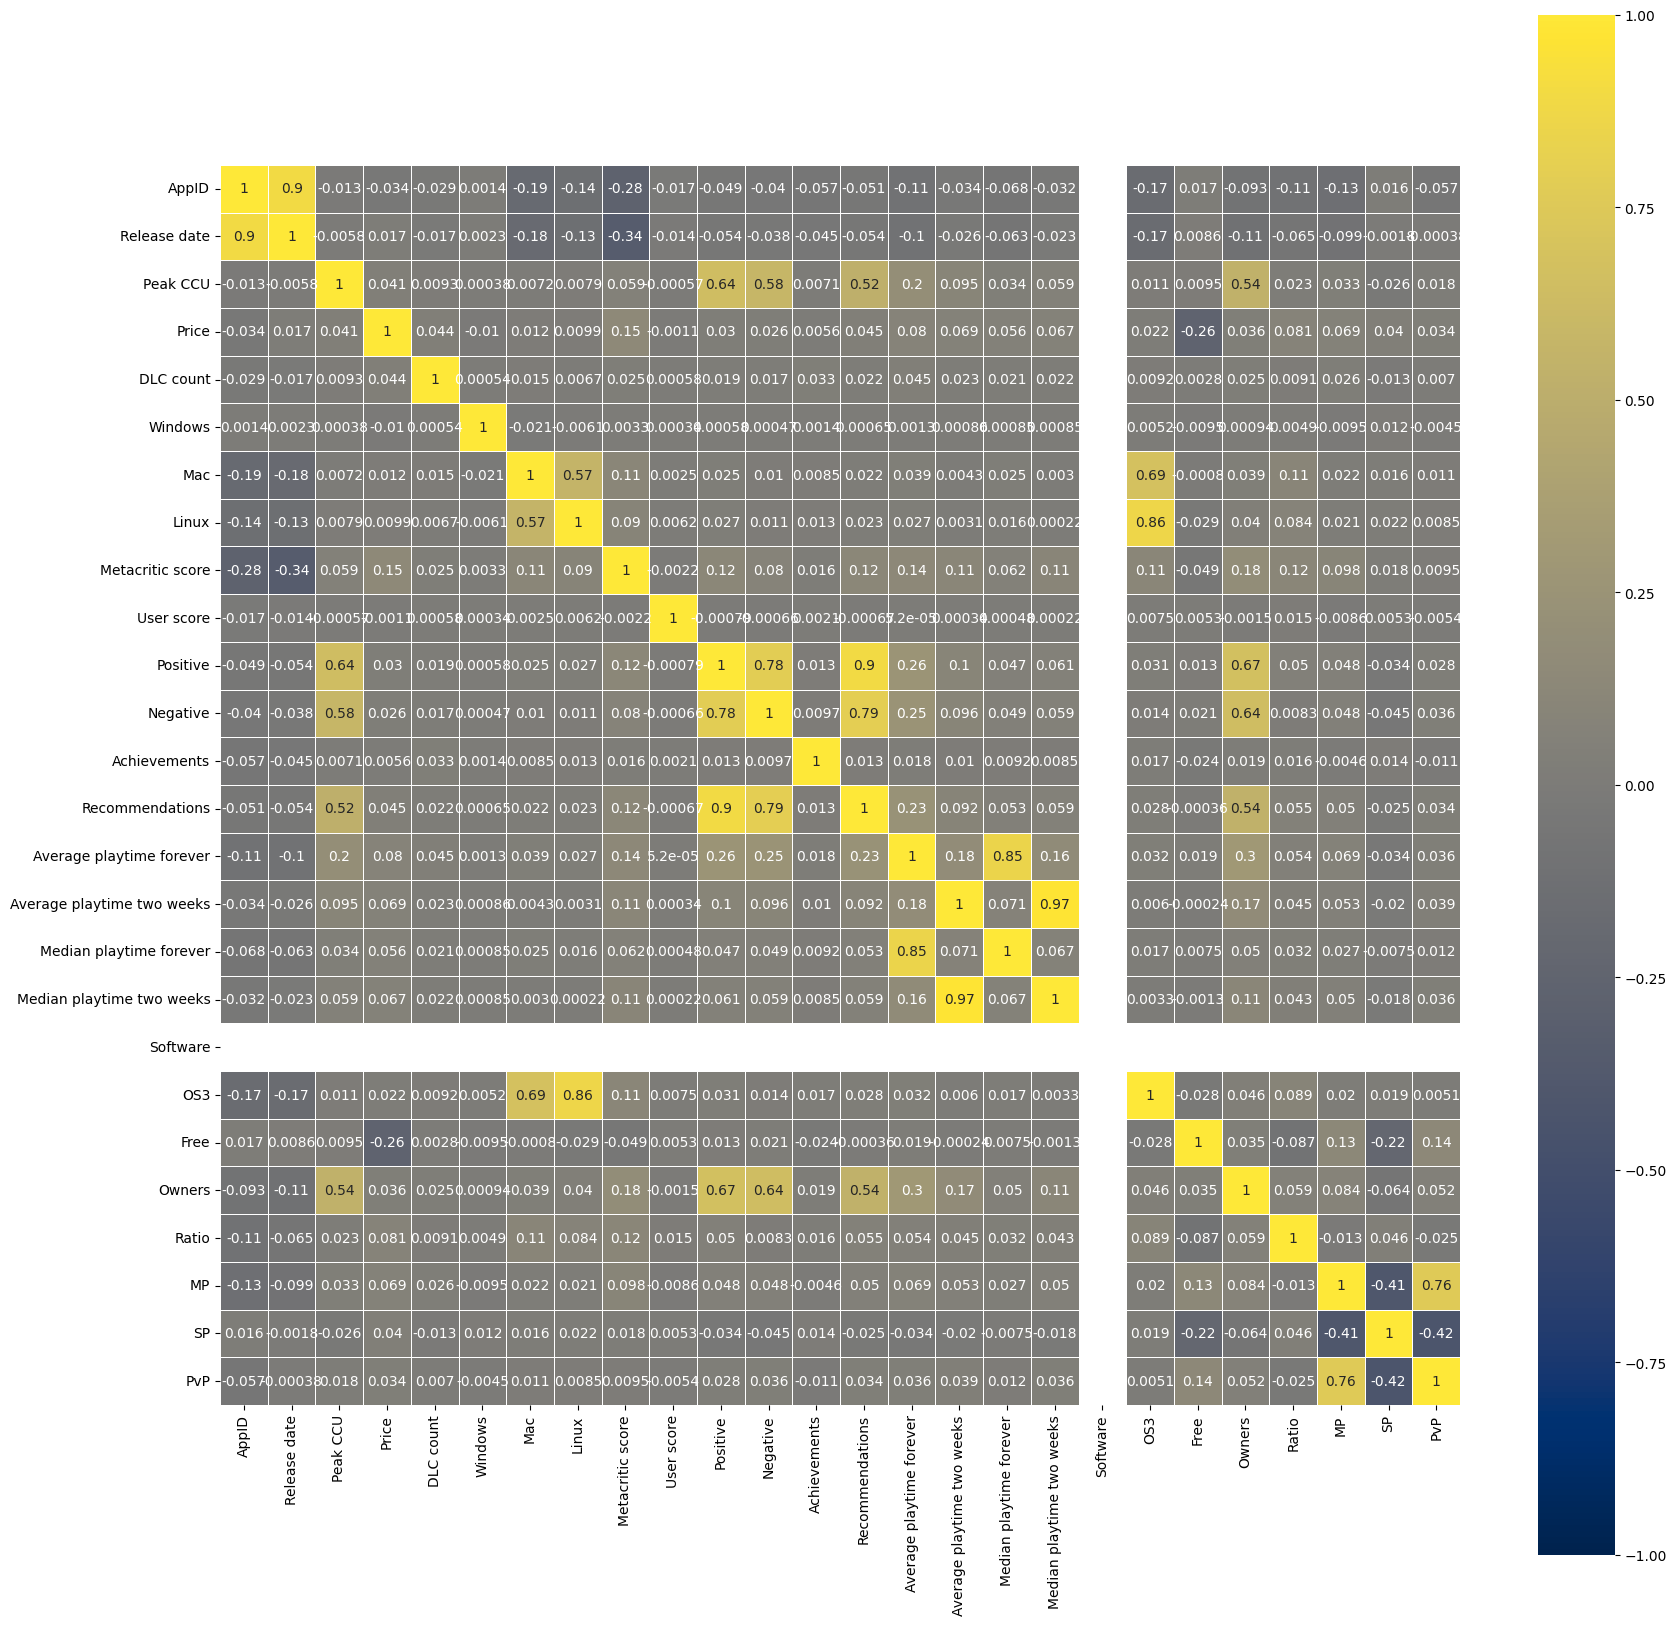

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df_numeric.corr(),
            vmin = -1,
            vmax = 1,
            cmap = "cividis", #sns.diverging_palette(145, 280, s=85, l=25, n=7),
            annot = True,
            square = True,
            linewidth = .5
            );

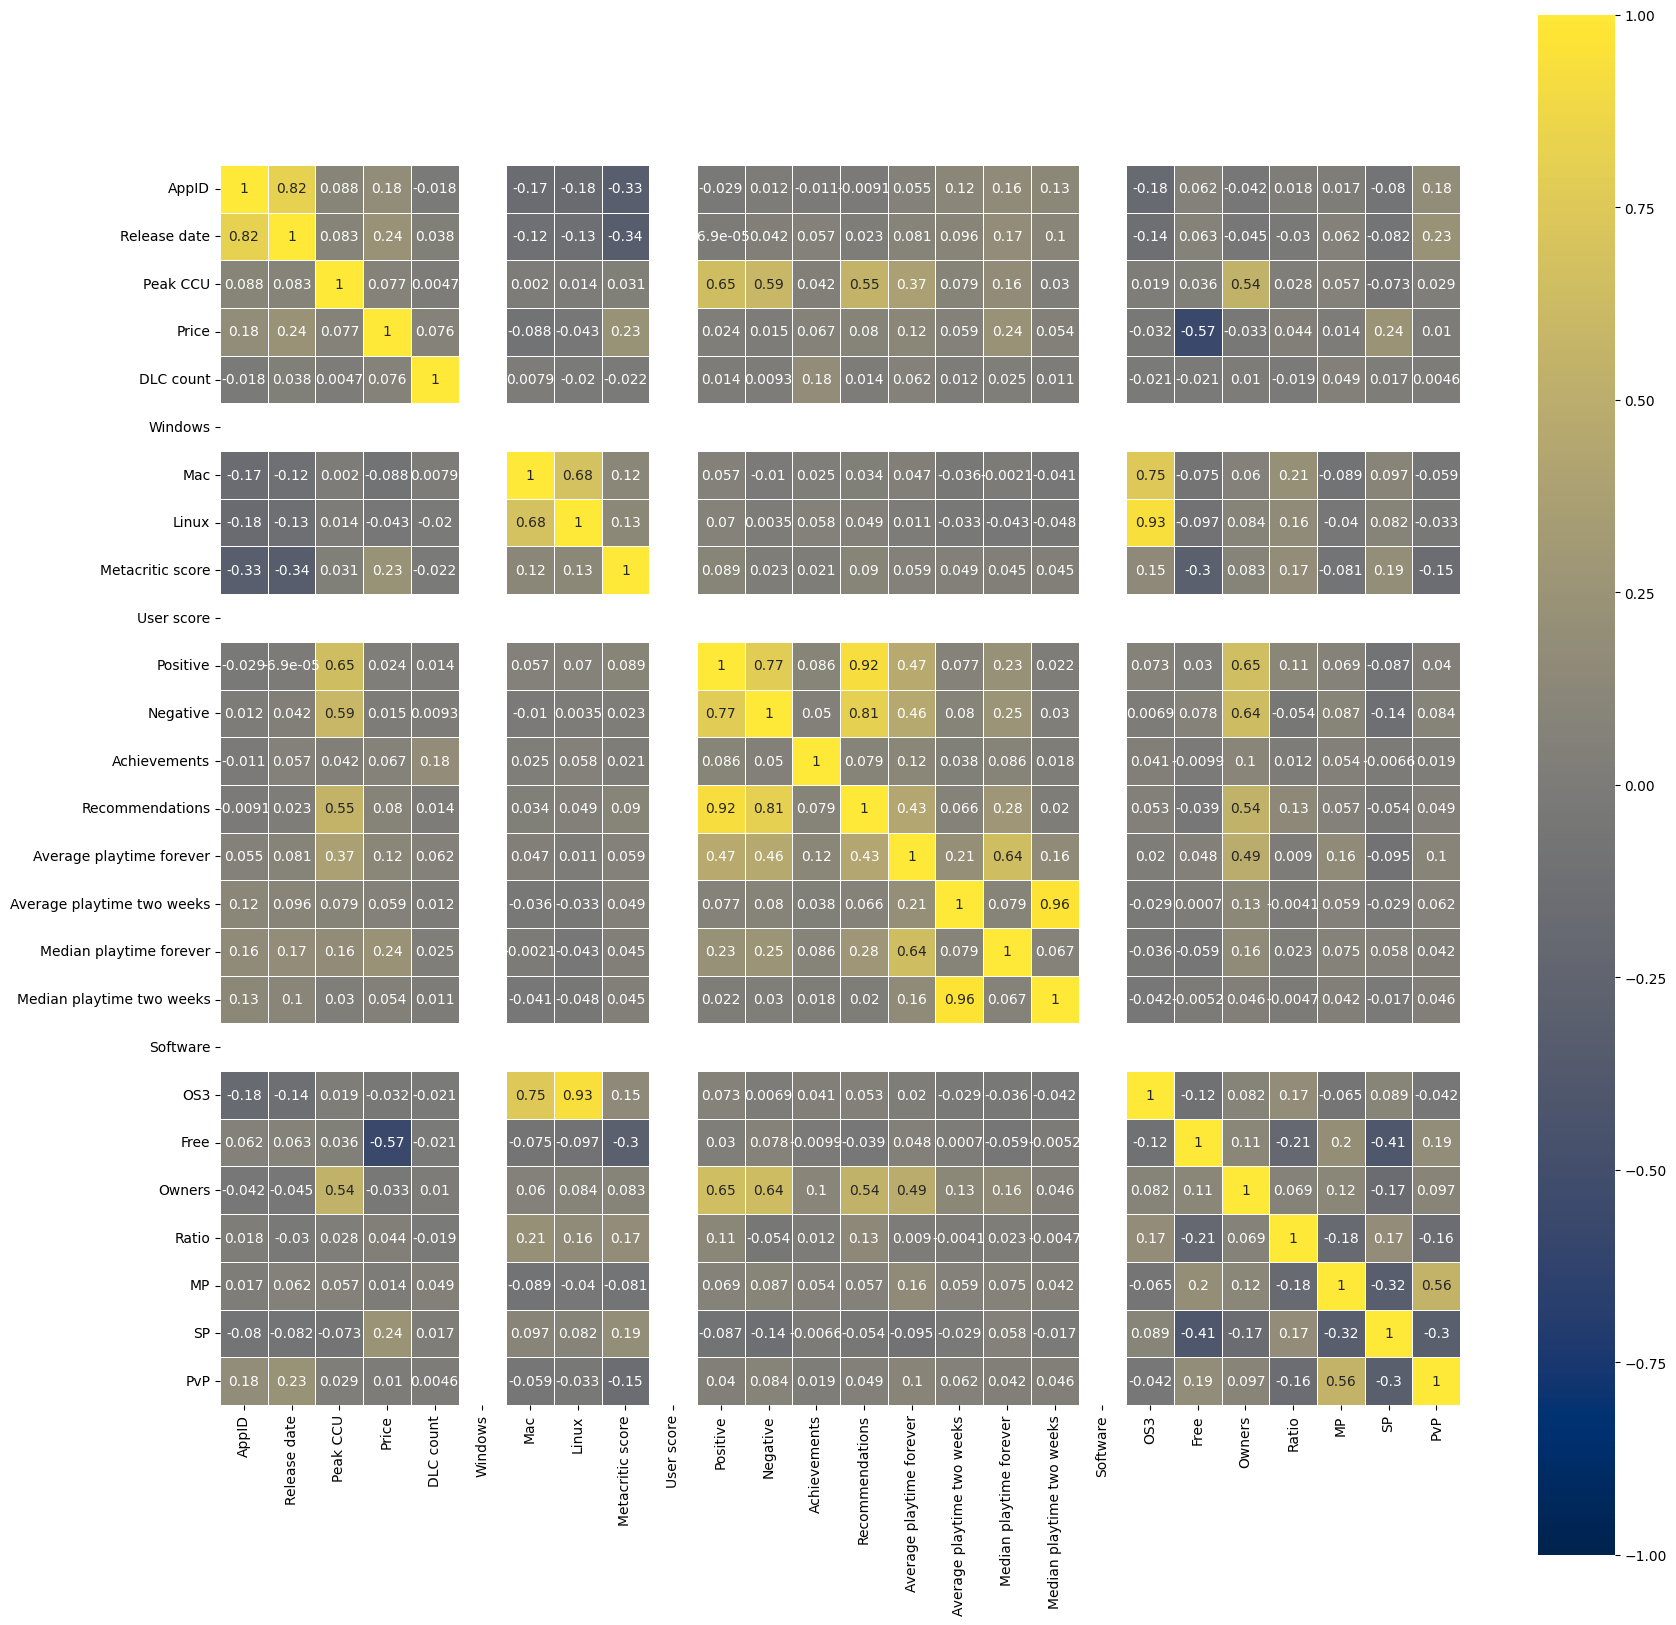

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(top_df_numeric.corr(),
            vmin = -1,
            vmax = 1,
            cmap = "cividis", #sns.diverging_palette(145, 280, s=85, l=25, n=7),
            annot = True,
            square = True,
            linewidth = .5
            );

# MP v SP analysis

In [44]:
df.MP.value_counts()

MP
0    64910
1    15595
Name: count, dtype: int64

In [45]:
df.SP.value_counts()

SP
1    76424
0     4081
Name: count, dtype: int64

In [46]:
df.PvP.value_counts()

PvP
0    70540
1     9965
Name: count, dtype: int64

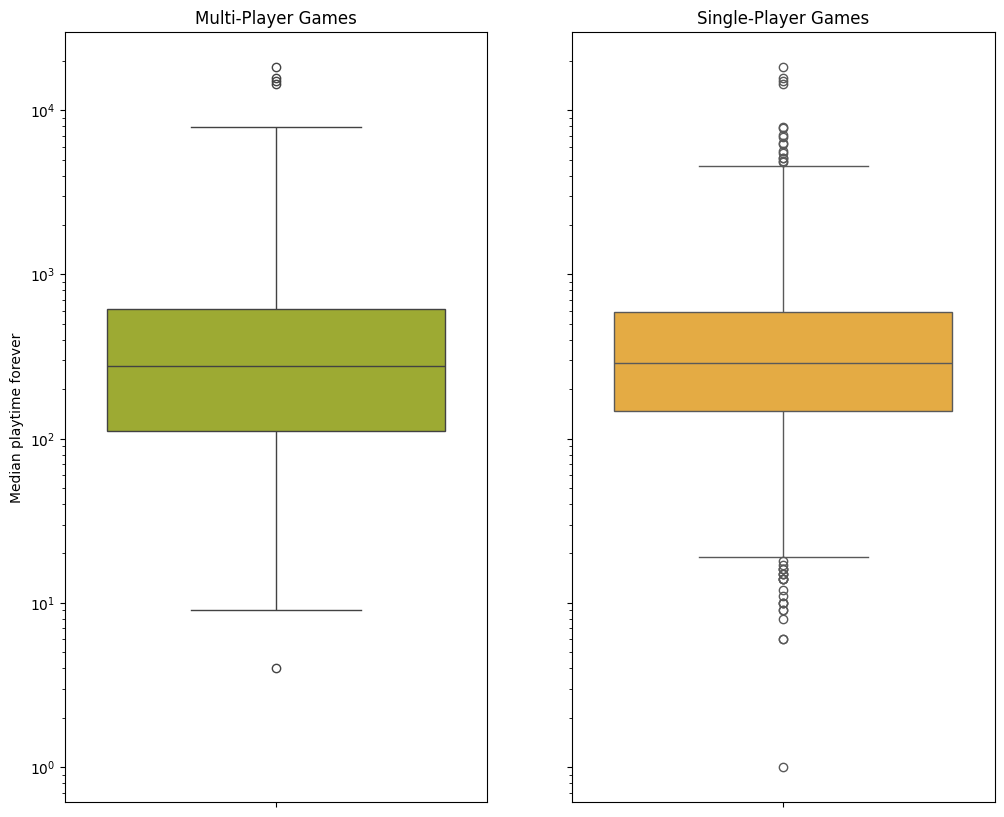

In [47]:
mp_mpf = top_df[top_df.MP == 1]["Median playtime forever"]
sp_mpf = top_df[top_df.SP == 1]["Median playtime forever"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10), sharey=True)

sns.boxplot(ax=axes[0], data=mp_mpf, log_scale=True, color="#acbe1f")
axes[0].set_title('Multi-Player Games')
sns.boxplot(ax=axes[1], data=sp_mpf, log_scale=True, color="#ffb229")
axes[1].set_title('Single-Player Games') 

plt.show()

In [48]:
mp_mpf.describe()

count     1092.000000
mean       614.060440
std       1276.891013
min          0.000000
25%        111.000000
50%        277.500000
75%        615.250000
max      18294.000000
Name: Median playtime forever, dtype: float64

In [49]:
sp_mpf.describe()

count     1641.000000
mean       569.585619
std       1088.818137
min          0.000000
25%        147.000000
50%        287.000000
75%        588.000000
max      18294.000000
Name: Median playtime forever, dtype: float64